## 1- import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 

from sklearn.model_selection import train_test_split 

from sklearn.metrics import mean_squared_error 

import xgboost as xgb

## 2- Read dataset

In [2]:
data  = pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")

## 3- Data analysis

In [3]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
data.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [5]:
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [7]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [8]:
data.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [9]:
data.shape

(30, 3)

## 4- Data visualization 

In [10]:
df = pd.DataFrame(data)

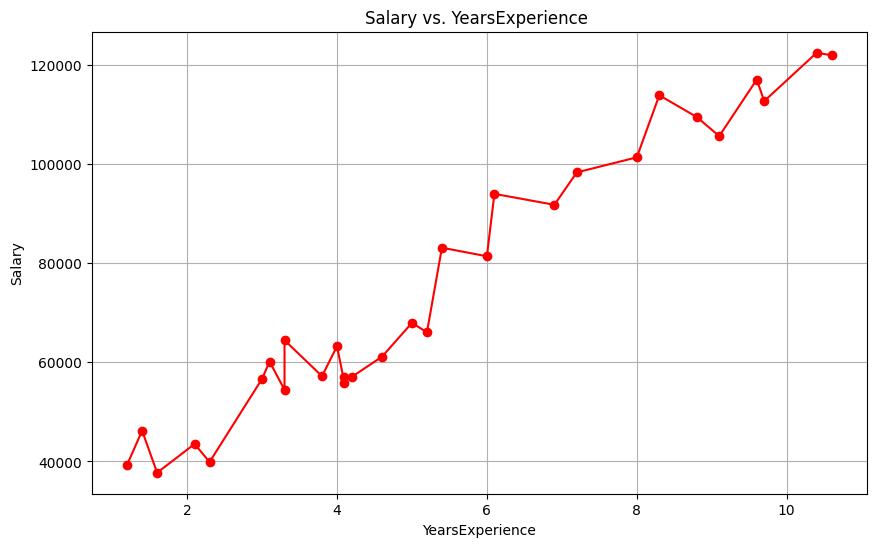

In [11]:
# 1 - Line Plot
plt.figure(figsize= (10,6))
plt.plot(df["YearsExperience"] , df["Salary"] ,marker = 'o' , color = 'red')
plt.title("Salary vs. YearsExperience ")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

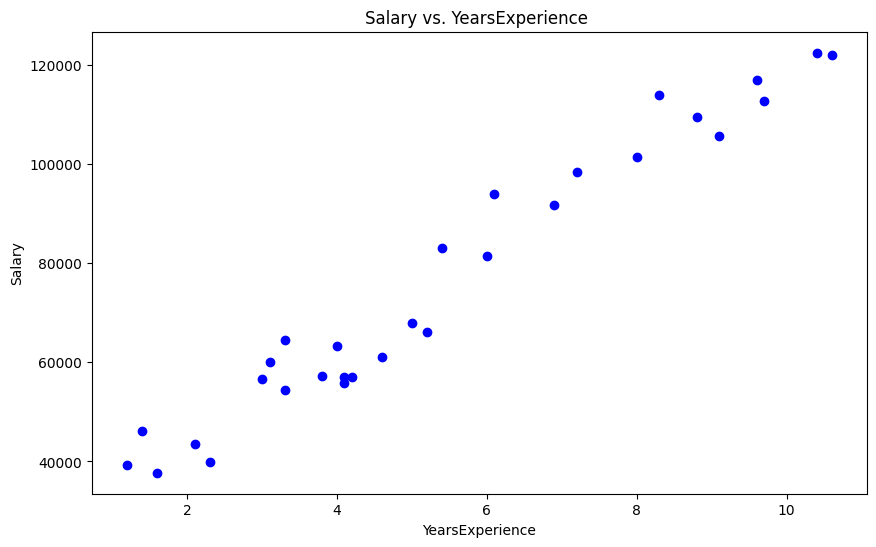

In [12]:
# 2- Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(df["YearsExperience"] , df["Salary"],color = 'blue')
plt.title("Salary vs. YearsExperience ")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

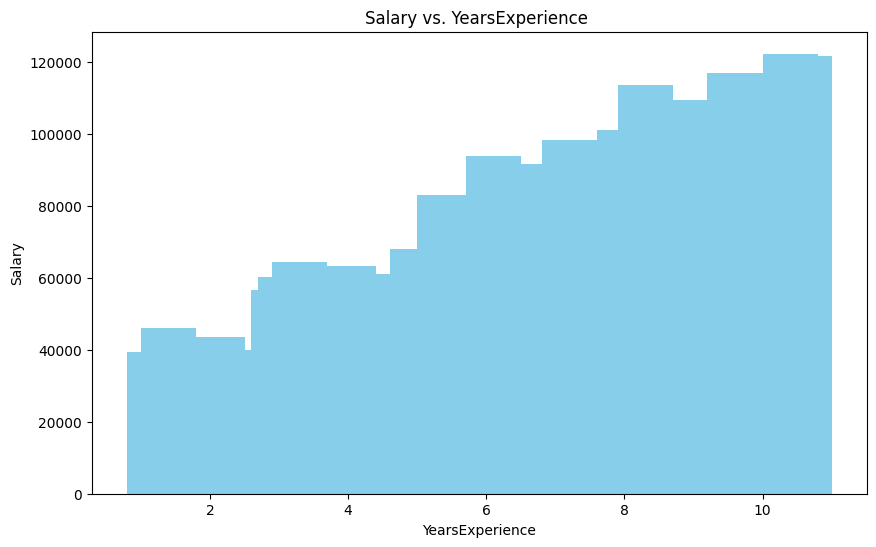

In [13]:
# 3 - Bar Plot
plt.figure(figsize=(10,6))
plt.bar(df["YearsExperience"] , df["Salary"],color = 'skyblue')
plt.title("Salary vs. YearsExperience ")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

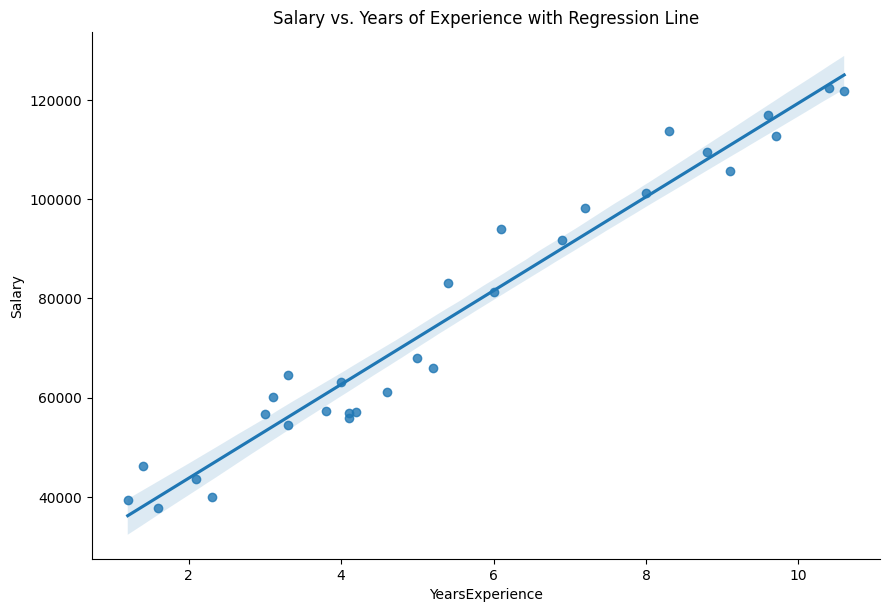

In [14]:
sns.lmplot(x='YearsExperience', y='Salary', data=df, height=6, aspect=1.5)
plt.title('Salary vs. Years of Experience with Regression Line')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


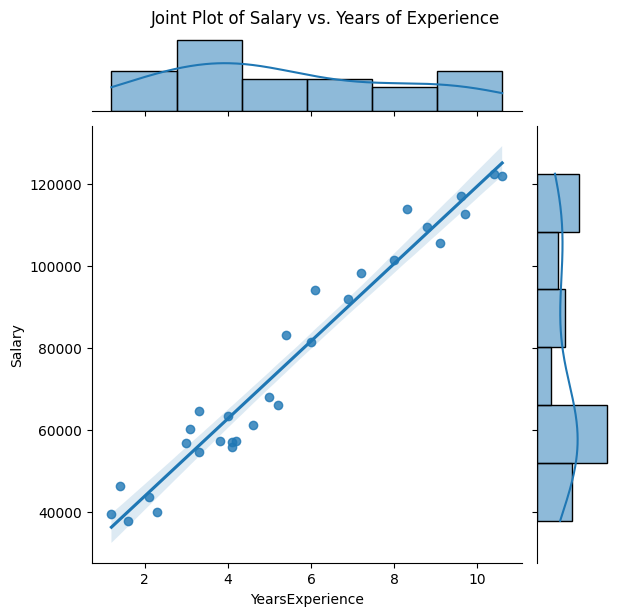

In [15]:
sns.jointplot(x='YearsExperience', y='Salary', data=df, kind='reg', height=6)
plt.suptitle('Joint Plot of Salary vs. Years of Experience', y=1.02)
plt.show()

In [16]:
fig = px.line(df, x='YearsExperience', y='Salary', title='Interactive Line Plot of Salary vs. Years of Experience')
fig.show()

In [17]:
fig = px.scatter(df, x='YearsExperience', y='Salary', title='Interactive Scatter Plot of Salary vs. Years of Experience')
fig.show()

In [18]:
fig = px.scatter_3d(df, x='YearsExperience', y='Salary', z='Unnamed: 0', title='3D Scatter Plot')
fig.show()

## 5- Spliting the data

In [19]:
x = data["YearsExperience"]
y = data["Salary"]

In [20]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state = 42)

In [21]:
x_train.shape

(24,)

In [22]:
x_test.shape

(6,)

## 6- Buliding the model 

In [23]:
model = xgb.XGBRegressor(
    objective = 'reg:squarederror',
    learning_rate = 0.1 ,
    max_depth = 5 ,
    n_estimators = 100 ,
    random_state = 42
)

In [24]:
model.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [25]:
y_pred  = model.predict(x_test)

In [26]:
y_pred 

array([116934.164,  61115.67 , 101275.625,  66031.484,  54546.24 ,
        54546.24 ], dtype=float32)

In [27]:
y_test

27    112636.0
15     67939.0
23    113813.0
17     83089.0
8      64446.0
9      57190.0
Name: Salary, dtype: float64

## 7- Evaluating the model

In [28]:
rmse = np.sqrt(mean_squared_error(y_test , y_pred))
print(f"Root Mean Squared Error (rmse) : {rmse:.4f}")

Root Mean Squared Error (rmse) : 10150.2988


## 8- Plot feature importance  

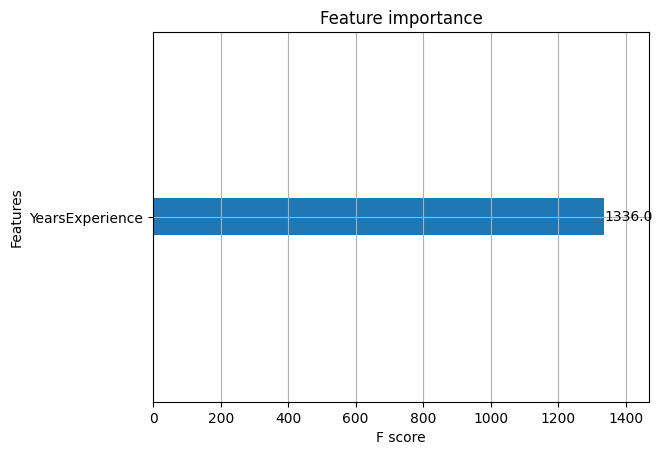

In [29]:
xgb.plot_importance(model)
plt.show()